# Project 2: Choosing a Model for Predicting on Unseen Data



**Parampreet SINGH, #C19377466**

# General Rules of the Project Submission

Python 3 and [Matplotlib](https://matplotlib.org/) will be used throughout the semseter, so it is important to be familiar with them. It is strongly suggested to go through [Stanford CS231n](http://cs231n.github.io/python-numpy-tutorial/) and [CS228](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) for more detailed Python and numpy tutorials if you haven't had used Python before. 

In some cells and files you will see code blocks that look like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
pass
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

You should replace the `pass` statement with your own code and leave the blocks intact, like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
y = m * x + b
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

When completing the notebook, please adhere to the following rules:
- Do not write or modify any code outside of code blocks
- Follow the instruction of the project description carefully
- Run all cells before submitting. <span style="color:red">**You will only get credit for code that has been run!**.</span>

The last point is extremely important and bears repeating:

### We will not re-run your notebook -- <span style="color:red">you will only get credit for cells that have been run</span>

### File name
Your Python program should be named **yourlastname_yourfirstname_P2.ipynb**, then zip it and upload to Canvas

### Package usage
You <span style="color:red">**cannot**</span> use python machine learning package that can have the k-fold validation algorithm as embedded function, for instance, **sklearn** package.

# Project Description

For Project 2 you will create a regression program and choose a model to predict the women’s Olympic 100-meter race record time for year **2024**. We will code the year of each race as we did in lecture 2.3. 

![caption](https://nianyil.people.clemson.edu/CPSC_4430/P2.jpg)


## Data File

A text file with the data is available on Canvas for the years 1928 through 2008 when the Olympics were held. The first line of the text file indicating there’re **m** lines of data and a **n** number of features (in this case, one). You need to write a code to read data from the file. You **can** use packages, such as **panda**, to load the data.

In [1]:
##############################################################################
#         TODO: Write the code for reading data from file                    #
##############################################################################
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

open_file = open("W100MTimes.txt", 'r')        # Opening file

first_line = [int (x) for x in (open_file.readline()).split("\t")]   # Reading first line for no of features and data points

# Created separate lists to store feature and label values
t=[]
feature = []
label = []

for i in range(first_line[0]):
    t.append(tuple((open_file.readline()).split("\t")))
    feature.append(float(t[i][0]))
    label.append(float(t[i][1].strip()))

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

## Pick the Best Model

Your project assignment is to compare four different models, linear, quadratic, cubic, and fourth. 

- $h_w(x) = w_0 + w_1x$
- $h_w(x) = w_0 + w_1x + w_2x^2$
- $h_w(x) = w_0 + w_1x + w_2x^2 + w_3x^3$
- $h_w(x) = w_0 + w_1x + w_2x^2 + w_3x^3 + w_4x^4$


In [2]:
##############################################################################
#                 TODO: Define the regression models                         #
##############################################################################
# Defined the regression models using a dictionary
X = { 0 : np.array([[1, i] for i in feature]),
     1 : np.array([[1, i, pow(i, 2)] for i in feature]),
     2 : np.array([[1, i, pow(i, 2), pow(i, 3)] for i in feature]),
     3 : np.array([[1, i, pow(i, 2), pow(i, 3), pow(i, 4)] for i in feature])}

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Next, you need to use <span style="color:red">**5-fold cross validation**</span> to pick out the best model for the prediction. You should present a chart of the error function $J$, similar to the one in the lecture (see below). You may need to use package like "**tabulate**" to print out the table.

```
                     Linear    Quadratic    Cubic    Fourth
-----------------  --------  -----------  -------  --------
1234                  10.25        24.25    12.25     23.25
5                     10.25        19.25    14.25     23.25
1235                  10.25        15.25    19.25     23.25
4                     10.25        10.25    20.25     23.25
1245                  10.25        24.25    12.25     23.25
3                     10.25        19.25    14.25     23.25
1345                  10.25        24.25    12.25     23.25
2                     10.25        19.25    14.25     23.25
2345                  10.25        24.25    12.25     23.25
1                     10.25        19.25    14.25     23.25
Mean for Training      0            0        0         0
Mean for Testing       0            0        0         0
```

You need to **plot** your training and testing $J$ with respect to the polynomial degree, similar to the one in the lecture.

In [3]:
##############################################################################
#                     TODO: 5-fold cross-validation                         #
##############################################################################
#                        Linear  Quadratic  Cubic  Fourth
#jcost = [     '2345'|  [   0   ,    0    ,   0   ,   0], 
#                 '1'|  [   0   ,    0    ,   0   ,   0],
#              '1345'|  [   0   ,    0    ,   0   ,   0],
#                 '2'|  [   0   ,    0    ,   0   ,   0], 
#              '1245'|  [   0   ,    0    ,   0   ,   0], 
#                 '3'|  [   0   ,    0    ,   0   ,   0],
#              '1235'|  [   0   ,    0    ,   0   ,   0],
#                 '4'|  [   0   ,    0    ,   0   ,   0],
#              '1234'|  [   0   ,    0    ,   0   ,   0],
#                 '5'|  [   0   ,    0    ,   0   ,   0],
# 'Mean for Training'|  [   0   ,    0    ,   0   ,   0],
#  'Mean for Testing'|  [   0   ,    0    ,   0   ,   0],]
     
jcost = np.zeros(48).reshape(12,4)

# returns w = (((𝑿.𝑻)𝑿)^−𝟏)(𝑿.𝑻)𝒚
def w_function(w_ft,w_lbl):
    return np.dot(np.linalg.inv(np.dot(w_ft.T,w_ft)),w_ft.T).dot(w_lbl)

# returns J(w0, w1,..,wN) = (1/m)(𝑿w−y).T(𝑿w−y)
def j_function(j_ft,j_lbl,w):
    return np.dot((np.dot(j_ft,w) - j_lbl).T,(np.dot(j_ft,w) - j_lbl))/len(j_ft)

x, y, k = 0, 0 ,1

# 5-fold cross-validation 
for i in range(0,12,2):
    x = y
    y = min(19,k*4)
    k += 1   
    for j in range(4):
        if i < 10:
            
            # Splitting the training set
            xj = X[j].copy()
            x_train = np.delete(xj, range(x,y), 0)
            lbl_train = np.delete(label, range(x,y))
            
            # Update cost function value
            jcost[i][j] = j_function(x_train, lbl_train, w_function(x_train, lbl_train)).round(2)

            # Splitting the testing set
            x_test = X[j][x:y].copy()
            lbl_test = label[x:y]
            
            # Update cost function value
            jcost[i+1][j] = j_function(x_test, lbl_test,w_function(x_train, lbl_train)).round(2)
        
        # Averaging Training and testing cost function values for the 5 folds
        else:
            jcost[i][j] = np.average(jcost[0:9:2, j])
            jcost[i+1][j] = np.average(jcost[1:10:2, j])
            
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

In [4]:
##############################################################################
#                     TODO: Print out the table chart                       #
##############################################################################
rowIDs = ['2345', '1','1345', '2','1245', '3','1235', '4','1234', '5', 'Mean for Training', 'Mean for Testing']
colIDs = ['Linear', 'Quadratic', 'Cubic', 'Fourth']
print(tabulate(jcost, headers = colIDs, showindex = rowIDs))
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

                     Linear    Quadratic    Cubic    Fourth
-----------------  --------  -----------  -------  --------
2345                  0.03         0.03     0.03       0.02
1                     0.2          0.12     0.31       0.84
1345                  0.05         0.04     0.03       0.03
2                     0.04         0.04     0.03       0.03
1245                  0.05         0.04     0.04       0.04
3                     0.03         0.01     0.01       0.01
1235                  0.05         0.03     0.03       0.03
4                     0.06         0.05     0.06       0.09
1234                  0.04         0.04     0.03       0.03
5                     0.18         0.07     0.04       0.48
Mean for Training     0.044        0.036    0.032      0.03
Mean for Testing      0.102        0.058    0.09       0.29


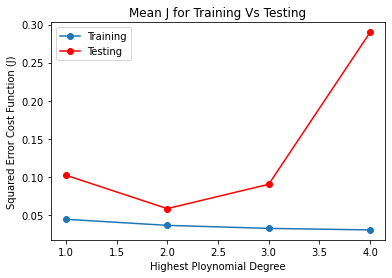

In [8]:
##############################################################################
#                     TODO: Plot the J curve                                 #
##############################################################################
plt.plot([1, 2, 3, 4], jcost[10], marker = 'o', label = 'Training')
plt.plot([1, 2, 3, 4], jcost[11], marker = 'o', color = 'red', label = 'Testing')
plt.title('Mean J for Training Vs Testing')
plt.xlabel('Highest Ploynomial Degree')
plt.ylabel('Squared Error Cost Function (J)')
plt.legend()
plt.show()
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss **which model is the best** for the record time prediction.

**Your Answer:**  Based on the data and plot, the average mean of squared error cost function (J) for testing is least for **Quadratic Regression Model**. Therefore, the quadratic regression model fits our data best among all analysed models. Hence, quadratic regression model is the best for the record time prediction.

Next, compute the final weights of the best model utilizing the **complete data set**

In [11]:
##############################################################################
#              TODO: Calculate the final regression model                    #
##############################################################################
w = [w_function(X[i],label) for i in X.keys()]
print(f'Final weights for Quadratic Regression Model:\n w0 -> {w[1][0].round(2)}\n w1 -> {w[1][1].round(2)}\n w2 -> {w[1][2].round(2)}')
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Final weights for Quadratic Regression Model:
 w0 -> 13.13
 w1 -> -0.04
 w2 -> 0.0


## Prediction Using the Best Model

Write a Python program that takes a **year** as input, then outputs the winning women’s Olympic 100-meter **race time** for that year (round to two decimal places). You need to try and print out the results of **at least three different years**, and the final trial should output the race time of **2024**.

In [13]:
##############################################################################
#         TODO: Predict the race time using the best model                   #
##############################################################################
ans = 'y'
while ans.lower() == 'y':
    while True:
        year = int(input("Please enter the Olympic year (after 1928) to predict the women's 100-meter race time:"))
        if year in range(1928, 2065, 4):
            break
        else:
            print("Please enter valid Olympic year!")
    year = year - 1900
    print(f"Women's 100-meter race time for year {year + 1900}: {(w[1][0] + (w[1][1]*year) + (w[1][2]*(year**2))).round(2)} sec ")
    
    while True:
        ans = input("Do you want to predict women's Olympic 100-meter race time for another year?(y/n): ")
        if ans in ['y','n','Y','N']:
            break
        else:
            print("Please select from (y/n)!")
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Please enter the Olympic year (after 1928) to predict the women's 100-meter race time:1952
Women's 100-meter race time for year 1952: 11.44 sec 
Do you want to predict women's Olympic 100-meter race time for another year?(y/n): y
Please enter the Olympic year (after 1928) to predict the women's 100-meter race time:2048
Women's 100-meter race time for year 2048: 11.25 sec 
Do you want to predict women's Olympic 100-meter race time for another year?(y/n): y
Please enter the Olympic year (after 1928) to predict the women's 100-meter race time:2024
Women's 100-meter race time for year 2024: 10.94 sec 
Do you want to predict women's Olympic 100-meter race time for another year?(y/n): n
